In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [6]:
gdp_df.shape

(8219, 4)

# Question 5: 
a)How many rows, columns in the gdp_df?  (8219, 4)  
b) what are the data types for each column?  Country= object, Year= int, Value and Value Footnotes= float

In [7]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


## Question 6: drop the value footnotes column and rename them Country, Value, GPD_Per_Capita

In [8]:
gdp_df=gdp_df.drop(columns=['Value Footnotes'])

In [9]:
gdp_df=gdp_df.rename( columns = {'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})

In [10]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


# Question 7:
a) how many countries don't have data for all the years?  19
b) which countries are missing data? 
Afghanistan 
Bhutan
Cayman Islands
CuraÃ§ao  
Djibouti 	
Faroe Islands 	
Greenland 	
Kosovo 	
Lebanon 	
Montenegro 	
San Marino 	
Serbia 	
Sint Maarten (Dutch part) 	
Somalia 	
Syrian Arab Republic 	
Tonga 	
Turks and Caicos Islands 	
Virgin Islands 	
West Bank and Gaza

c)look at the number of observations per year. what do you notice?  Earlier years, 1990s, looked at/collected data from fewer countries than later years with the highest being 2013 and on. 

In [11]:
years = gdp_df.groupby('Country').count()
years.head()

,Year,GDP_Per_Capita
Country,,
Afghanistan,24,24
Africa Eastern and Southern,34,34
Africa Western and Central,34,34
Albania,34,34
Algeria,34,34


In [12]:
country_less_years=years.loc[years.Year<34]

In [13]:
country_less_years

,Year,GDP_Per_Capita
Country,,
Afghanistan,24,24
Bhutan,33,33
Cayman Islands,18,18
CuraÃ§ao,24,24
Djibouti,11,11
Faroe Islands,16,16
Greenland,32,32
Kosovo,16,16
Lebanon,33,33


In [14]:
country_less_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Afghanistan to West Bank and Gaza
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year            19 non-null     int64
 1   GDP_Per_Capita  19 non-null     int64
dtypes: int64(2)
memory usage: 456.0+ bytes


In [15]:
gdp_df['Year'].value_counts()

Year
2020    247
2021    247
2013    247
2016    247
2019    247
2018    247
2017    247
2014    247
2015    247
2022    246
2011    246
2012    246
2009    245
2010    245
2008    244
2007    242
2006    242
2005    241
2003    241
2004    241
2002    241
2023    240
2001    240
2000    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

<Axes: xlabel='Year'>

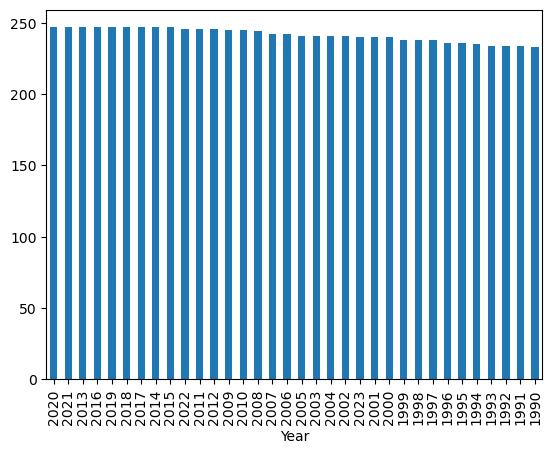

In [16]:
gdp_df['Year'].value_counts().plot(kind = 'bar')

# Question 8:
show the distribution of GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot.

First I had to make a DF of JUST the year 2020.  I did this with gdp_df['Year']==2020, this assigns the year to be 2020 when I use the .loc function to go find all the rows where the year is202
. Then I gave that a name, which creates the DF.

In [17]:
gdp_df_2020=gdp_df.loc[gdp_df['Year']==2020]

In [18]:
gdp_df_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


Question 8: The graphs are below (his, dens, violin). All three plots are largely skewed to the left.  The histogram shows that ~25,000GDPpercapita had the most countries out of the categories individually.  It also did not fator in those with negative gdp?  The density plot shows where the bulk of the data points lie and looks similar to the histogram. 

<Axes: >

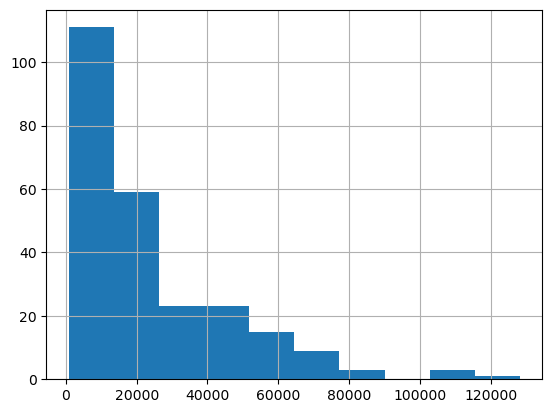

In [19]:
gdp_df_2020['GDP_Per_Capita'].hist()

array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

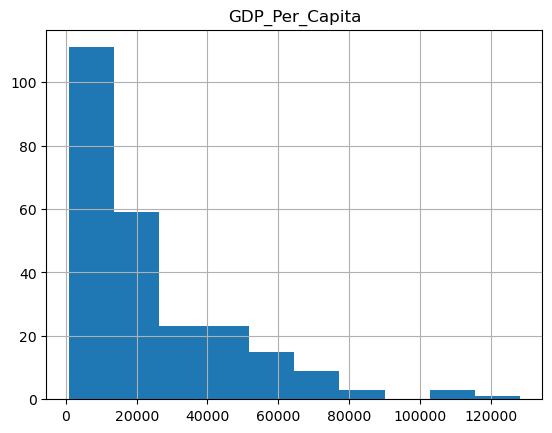

In [20]:
gdp_df_2020.hist('GDP_Per_Capita')

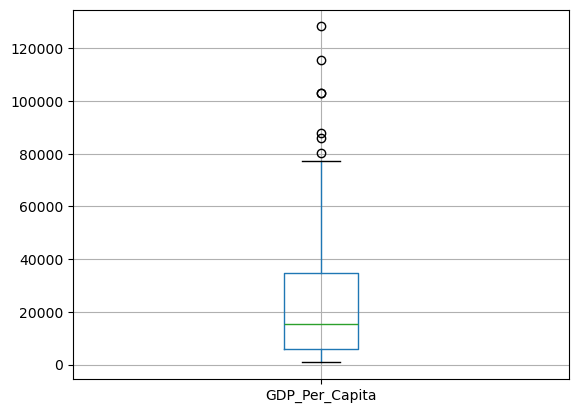

In [21]:
gdp_df_2020.boxplot('GDP_Per_Capita');

Again, showing a highly skewed density towards the low end of the distribution

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

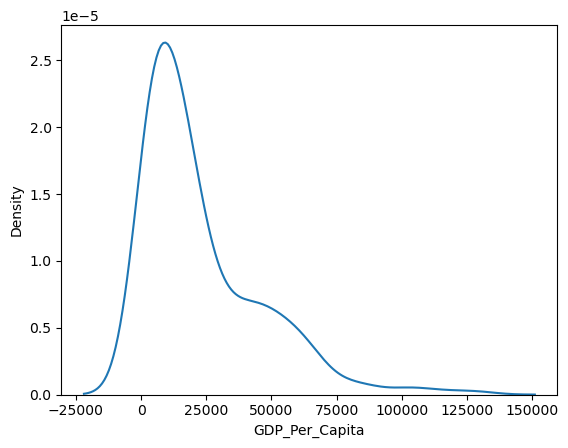

In [22]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'])

similar to a violin, predicting where it goes  below 0.  100% of the data will fit under the line. tricky to understand, try to avoid...

<Axes: xlabel='GDP_Per_Capita'>

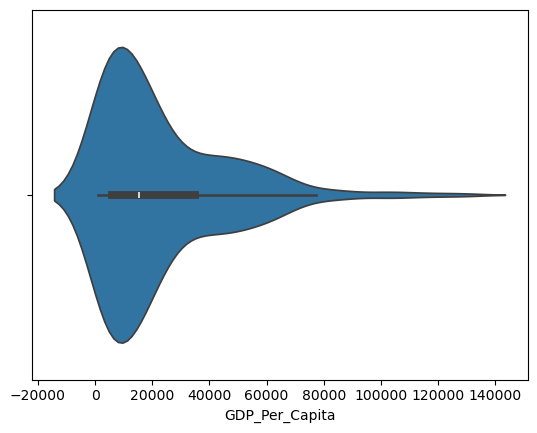

In [23]:
sns.violinplot(x=gdp_df_2020['GDP_Per_Capita'])

white dot is the median.  this also goes below 0, where it is being 'predictive' based on the data provided. small box plot in the middle.

## Question 9: 23044.94

In [24]:
gdp_df_2020['GDP_Per_Capita'].mean()

np.float64(23044.942555569738)

# Question 10 below:

In [25]:
gdp_list=[1990,2000,2010,2020]

In [26]:
gdp_decades= gdp_df.loc[gdp_df.Year.isin(gdp_list)]
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

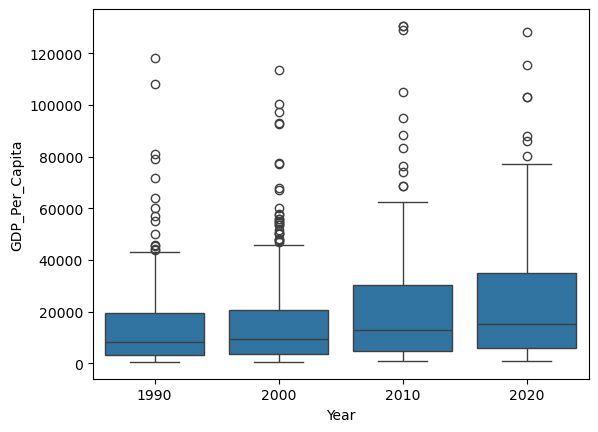

In [27]:
sns.boxplot(data=gdp_decades, y= 'GDP_Per_Capita', x='Year')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

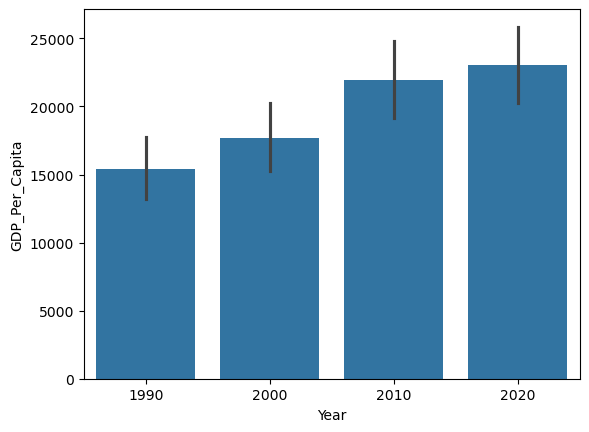

In [28]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

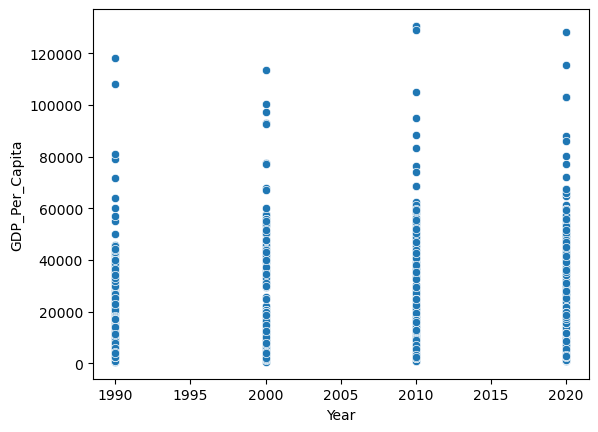

In [29]:
sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

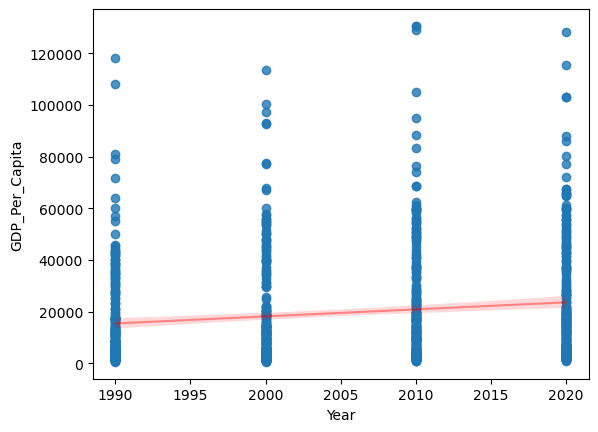

In [30]:
sns.regplot(
    x=gdp_decades['Year'],
    y=gdp_decades['GDP_Per_Capita'],
   line_kws={ "color": "r","alpha": 0.4,  "linewidth": 1.5,})






x-jitter: if all lined up exactly right, move them to the side some so we can see a little better

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

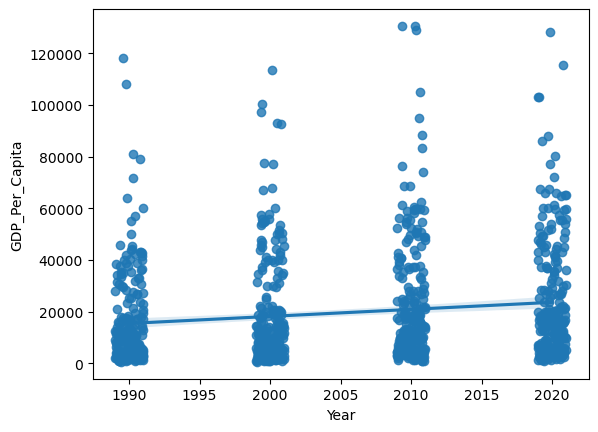

In [31]:
sns.regplot(data= gdp_decades, x = 'Year', y= 'GDP_Per_Capita', x_jitter=True)

# Question 11: Which COuntry was the first to have a GDP of greater than $100,000? 
ANSWER: Brunei in 1990

In [32]:
gdp_df.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
5161,Mozambique,1992,510.822823
5158,Mozambique,1995,525.418672
4247,Liberia,1995,534.809715
5159,Mozambique,1994,546.209688
5163,Mozambique,1990,547.622781
...,...,...,...
6128,Qatar,2011,145591.019357
4469,"Macao SAR, China",2011,155185.383338
4466,"Macao SAR, China",2014,162582.374111
4468,"Macao SAR, China",2012,164065.103441


In [33]:
gdp_df.loc[gdp_df['GDP_Per_Capita']>100000.000000].sort_values('Year', ascending=True)

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
4423,Luxembourg,2023,130373.477942
6511,Singapore,2023,127543.554752


# Question 12: Which country had the highest GDP in 2020?  Luxembourg
Create a plot showing how this country's gdp has changed over the timespan of this dataset.  Down below I made a bar graph(seaborn and matplotlib)

In [34]:
gdp_df_2020.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


In [35]:
luxembourg_gdp=gdp_df.loc[gdp_df['Country']=='Luxembourg']

<Axes: xlabel='Year'>

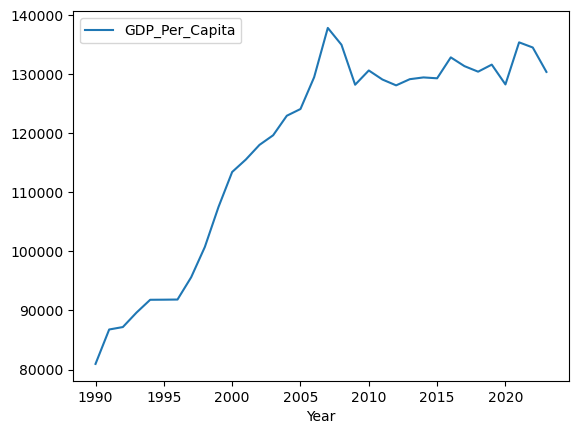

In [36]:
luxembourg_gdp.plot(kind= 'line', x= "Year")

AttributeError: module 'matplotlib' has no attribute 'ylimit'

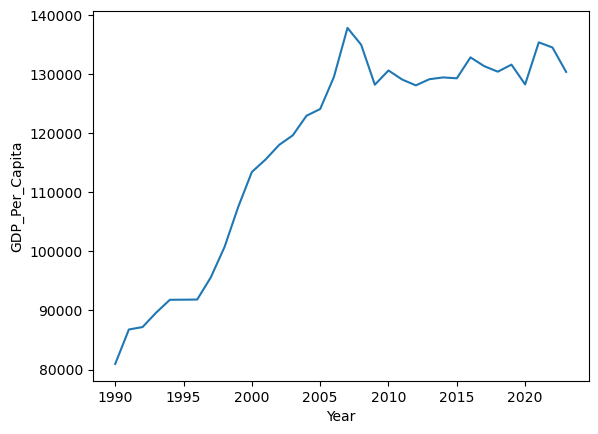

In [38]:
sns.lineplot(data= luxembourg_gdp, x ='Year', y='GDP_Per_Capita')
plt.ylimit(bottom=0, top=150000);

In [39]:
import matplotlib.pyplot as plt

<BarContainer object of 34 artists>

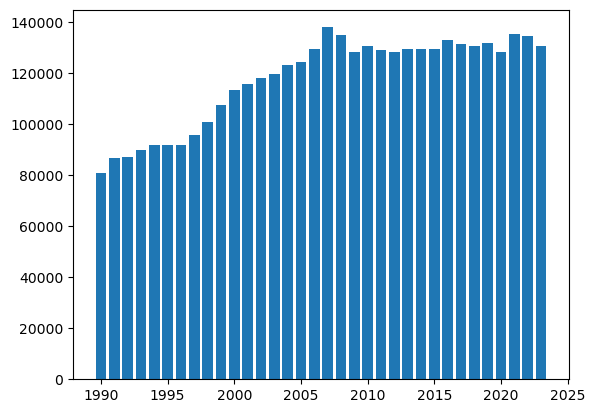

In [40]:
plt.bar('Year', 'GDP_Per_Capita', data=luxembourg_gdp)

# Question 13: Which Country had the lowest GDP in 2020? 
Burundi.  
Create a plot showing the dgp changed over the timespan of the dataset.  Burundi's GDP decreased over the years from 1990-2023

In [41]:
gdp_df_2020.sort_values('GDP_Per_Capita', ascending=True)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [42]:
gdp_df_2020.sort_values('GDP_Per_Capita', ascending=True).Country.head(1)

1046    Burundi
Name: Country, dtype: object

In [43]:
burundi_gdp=gdp_df.loc[gdp_df['Country']=='Burundi']

<BarContainer object of 34 artists>

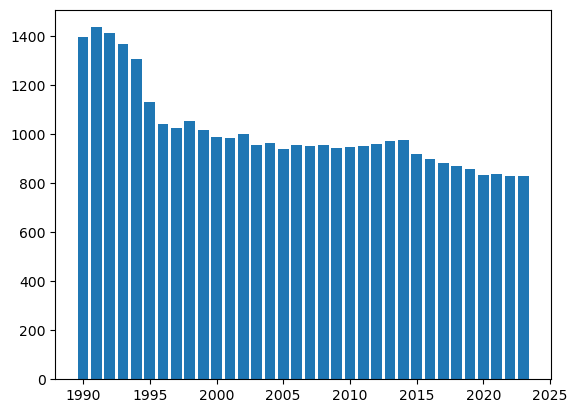

In [44]:
plt.bar('Year', 'GDP_Per_Capita', data=burundi_gdp)

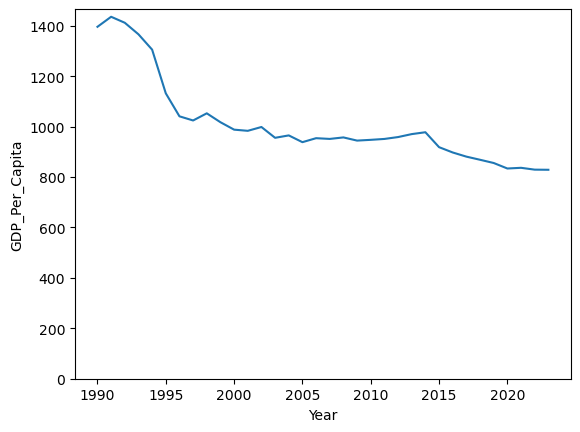

In [45]:
sns.lineplot(data= burundi_gdp, x ='Year', y='GDP_Per_Capita')
plt.ylim(bottom=0);

# Question 14: read in the internet data set.  
you will get errors, figure out how to fix.  once it's read in, look at the top and bottom rows to make sure it's been read in correctly.  check the data types of the columns.
- first I used " sep='\t' ", per google.  not sure this helped.

In [46]:
internet_df=pd.read_csv('../data/internet_use.csv', nrows=6083)

In [47]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [48]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [49]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [50]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


# Question 15:  
Drop the value footnotes column and rename the remaining three to 'Country', 'Year', 'Internet_Users_Pct'.

In [51]:
internet_df=internet_df.drop(columns=['Value Footnotes'])

In [52]:
internet_df=internet_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value': 'Internet_Users_Pct'})

# Question16:
Look at the number of observations in the dataset per year.  what do you notice?
As the years go up, there's less data collected from fewer countries?
Perhaps as more countries started to have internet usage as time went on, then fewer and fewer countries were needed to be tracked?


In [53]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [54]:
internet_df.value_counts('Year')

Year
1990    226
2007    217
2011    214
2002    214
2009    214
2008    214
2001    212
2006    212
2005    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2013    203
2015    203
1998    195
1997    188
2020    186
2021    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

In 1990, they checked in with all the countries...

In [55]:
internet_df.groupby('Country').count()

,Year,Internet_Users_Pct
Country,,
Afghanistan,20,20
Albania,29,29
Algeria,30,30
American Samoa,1,1
Andorra,26,26
...,...,...
Virgin Islands (US),25,25
Wallis and Futuna,15,15
Yemen,26,26


# Question 17: What is the first year to have a non-zero internet users percentage value?
1995, Ethiopia at .000018 percent

In [56]:
internet_df.sort_values('Internet_Users_Pct', ascending=True)

,Country,Year,Internet_Users_Pct
3559,Marshall Islands,1992,0.0
3558,Marshall Islands,1993,0.0
776,British Virgin Islands,1990,0.0
4525,Qatar,1990,0.0
4435,Poland,1990,0.0
...,...,...,...
5718,United Arab Emirates,2020,100.0
4790,Saudi Arabia,2022,100.0
5717,United Arab Emirates,2021,100.0
5716,United Arab Emirates,2022,100.0


In [57]:
internet_df.loc[internet_df.Internet_Users_Pct>0.0].sort_values('Year')

,Country,Year,Internet_Users_Pct
4197,Norway,1990,0.707299
2829,Italy,1990,0.017545
3980,Netherlands (Kingdom of the),1990,0.334387
2192,Germany,1990,0.125892
2796,Israel,1990,0.110774
...,...,...,...
3141,Latvia,2023,92.187900
677,Bosnia and Herzegovina,2023,83.377200
427,Bangladesh,2023,44.502700
5266,Sweden,2023,95.703300


# Question 18: How does the distribution of internet users percent differ for 2000 and 2014
The percentage of internet users were highly distrubted towards the low end, where a higher percentage of ppl had very little/no internet use or access.
Then by 2014, the distrubution has started to spread out.  

In [58]:
internet_2000_df=internet_df.loc[internet_df['Year']==2000]

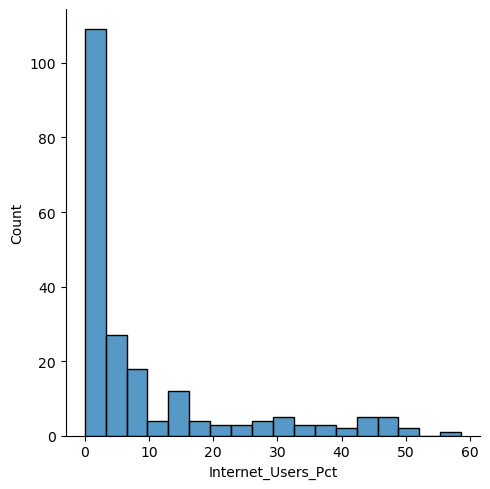

In [59]:
sns.displot( data=internet_2000_df["Internet_Users_Pct"])

In [60]:
internet_2014_df=internet_df.loc[internet_df['Year']==2014]

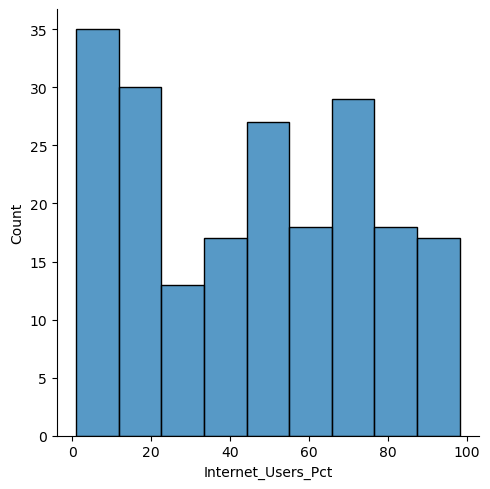

In [61]:
sns.displot( data=internet_2014_df["Internet_Users_Pct"])

<Axes: xlabel='Internet_Users_Pct', ylabel='Count'>

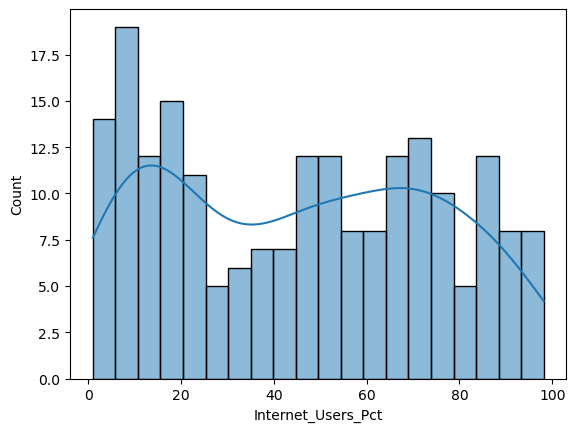

In [62]:
sns.histplot(data=internet_2014_df, x="Internet_Users_Pct", kde=True, bins=20)


# Question 19: For how many countries was the percentage of internet users below 5% in 2014?
10

In [63]:
less_5pct_2014=internet_2014_df.loc[internet_2014_df['Internet_Users_Pct']<5]

In [64]:
less_5pct_2014

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [65]:
less_5pct_2014.value_counts().sum()

np.int64(10)

# Question 20: Merge the two data frames to one.  do this so taht you keep all rows from each of the data frames.  Call it gdp_and_internet_use.

Will need to join on two things.

In [66]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [67]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [72]:
gdp_and_internet_use=pd.merge(internet_df, gdp_df, how='left', on=['Country','Year'])

In [73]:
gdp_and_internet_use.head()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2019,17.60,2927.245144
1,Afghanistan,2018,16.80,2902.392113
2,Afghanistan,2017,13.50,2952.998916
3,Afghanistan,2016,11.00,2958.785399
4,Afghanistan,2015,8.26,2967.692067


In [74]:
gdp_and_internet_use.tail()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
6078,Zimbabwe,1997,0.033080,4304.406272
6079,Zimbabwe,1996,0.016790,4271.479930
6080,Zimbabwe,1995,0.007684,3935.280057
6081,Zimbabwe,1994,0.001739,3965.730986
6082,Zimbabwe,1990,0.000000,4013.299059


# Question 21: Find the 3 countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid to compare how the GDP per capita has changed over 
# time for these three countries.  What do you notice?

Top 3: Iceland, Falkland Islands, Bermuda.

In [75]:
internet_2014_df.sort_values(by='Internet_Users_Pct', ascending=False)

,Country,Year,Internet_Users_Pct
2592,Iceland,2014,98.15800
1893,Falkland (Malvinas) Islands,2014,97.60000
602,Bermuda,2014,96.80000
4173,Norway,2014,96.30050
1546,Denmark,2014,95.99350
...,...,...,...
5116,South Sudan,2014,2.60000
5055,Somalia,2014,1.63000
4073,Niger,2014,1.24868
873,Burundi,2014,1.04239


In [76]:
internet_2014_df.sort_values(by='Internet_Users_Pct', ascending=False).Country.head(3)

2592                        Iceland
1893    Falkland (Malvinas) Islands
602                         Bermuda
Name: Country, dtype: object

In [77]:
top_three_internet_use_countries=internet_2014_df.sort_values(by='Internet_Users_Pct', ascending=False).Country.head(3)

In [82]:
top_3_countries_gdp=gdp_df.loc[gdp_df.Country.isin(top_three_internet_use_countries)]
top_3_countries_gdp

,Country,Year,GDP_Per_Capita
738,Bermuda,2023,98041.688721
739,Bermuda,2022,98057.447098
740,Bermuda,2021,92276.234605
741,Bermuda,2020,87894.401174
742,Bermuda,2019,94755.432811
...,...,...,...
3213,Iceland,1994,38856.472813
3214,Iceland,1993,37829.544274
3215,Iceland,1992,37720.719265
3216,Iceland,1991,39531.470666


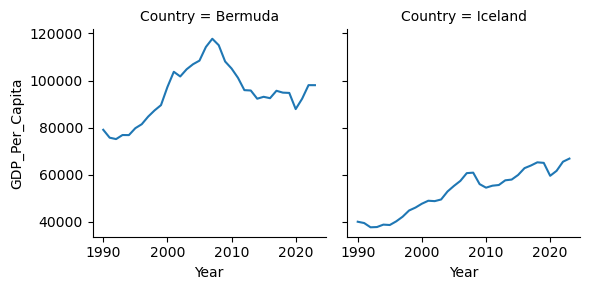

In [83]:
g=sns.FacetGrid(top_3_countries_gdp, col='Country')
g.map(sns.lineplot,'Year','GDP_Per_Capita')

In [85]:
top_5_internet_use_countries=internet_2014_df.sort_values(by='Internet_Users_Pct', ascending=False).Country.head(5)

In [86]:
top_5_countries_gdp=gdp_df.loc[gdp_df.Country.isin(top_5_internet_use_countries)]
top_5_countries_gdp

,Country,Year,GDP_Per_Capita
738,Bermuda,2023,98041.688721
739,Bermuda,2022,98057.447098
740,Bermuda,2021,92276.234605
741,Bermuda,2020,87894.401174
742,Bermuda,2019,94755.432811
...,...,...,...
5567,Norway,1994,64373.901096
5568,Norway,1993,61626.115045
5569,Norway,1992,60278.978538
5570,Norway,1991,58535.572877


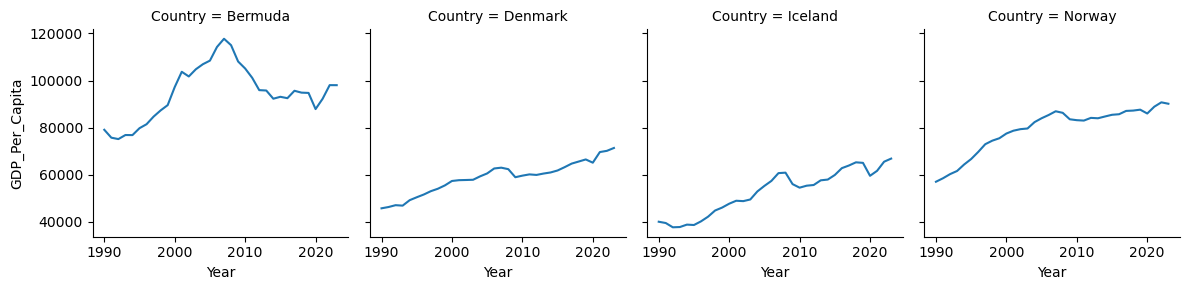

In [87]:
g=sns.FacetGrid(top_5_countries_gdp, col='Country')
g.map(sns.lineplot,'Year','GDP_Per_Capita')

# Question 22: Subset 'gdp_and_internet_use' to just the year 2014.  Save this as gdp_and_internet_use_2014

In [90]:
gdp_and_internet_use_2014=gdp_and_internet_use.loc[gdp_and_internet_use.Year==2014]

In [91]:
gdp_and_internet_use_2014.head()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
5,Afghanistan,2014,7.0000,3017.942544
28,Albania,2014,54.3000,12788.747231
57,Algeria,2014,29.5000,15073.762940
87,Andorra,2014,86.1000,59929.244467
114,Angola,2014,21.3623,10250.592404


# Question 23: Create a plot which compares IUP and GDP for the year 2014. 
What do you notice? investigate any unusual points.
internet use/access is lower in countries with lower gdp

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

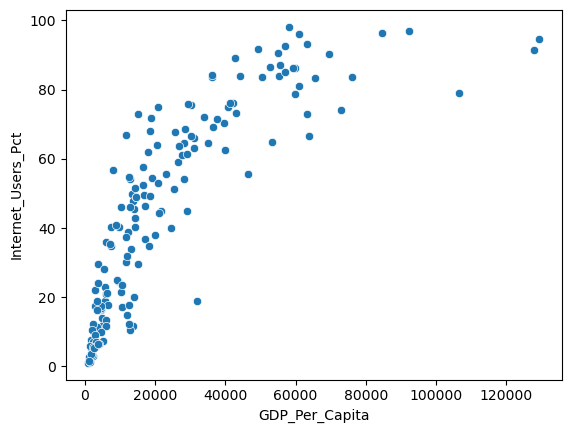

In [93]:
sns.scatterplot(data=gdp_and_internet_use_2014, x ='GDP_Per_Capita', y= 'Internet_Users_Pct')